In [1]:
#Import libraries that will be used in the project
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt 
import sklearn
import csv
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
from jupyter_datatables import init_datatables_mode

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [3]:
#load the dataset
loan_data = pd.read_csv('../datasets/bankrecords.csv')

In [4]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


DATA PREPARATION

In [5]:
loan_data.shape

(614, 13)

In [6]:
#DELETE COLUMN(S) THAT WE MAY NOT REQUIRE FOR THE PROJECT
del loan_data['Loan_ID']

In [7]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
loan_data.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
#converting all non-numeric value columns into numeric value columns. 
for column in loan_data.columns:
    if loan_data[column].dtype == np.number:
        continue
    loan_data[column] = LabelEncoder().fit_transform(loan_data[column])

2022-03-30 21:15:53,566 [1788] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-9-ddf411b15a60>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if loan_data[column].dtype == np.number:



In [10]:
loan_data.dtypes

Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [11]:
#CHECK MISSING VALUES BY PERCENTAGE. THIS WILL HELP IN CHOOSING THE BEST METHOD FOR FILLING THEM UP
loan_data.isnull().sum() / len(loan_data) * 100

Gender               0.000000
Married              0.000000
Dependents           2.442997
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [12]:
loan_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,376,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,306,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,139,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,90,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,381,0.0,141.0,360.0,1.0,2,1
5,1,1,2.0,0,1,353,4196.0,267.0,360.0,1.0,2,1
6,1,1,0.0,1,0,65,1516.0,95.0,360.0,1.0,2,1
7,1,1,3.0,0,0,146,2504.0,158.0,360.0,0.0,1,0
8,1,1,2.0,0,0,269,1526.0,168.0,360.0,1.0,2,1
9,1,1,1.0,0,0,470,10968.0,349.0,360.0,1.0,1,0


In [13]:
#filling up missing values in the dataset (USING DIFFERENT METHODS - CONSIDERING THE TYPE OF VARIABLES IN THE PARTICULAR COLUMN(S))
loan_missing_1 = loan_data.LoanAmount.mean()
loan_data.LoanAmount = loan_data.LoanAmount.fillna(loan_missing_1)

In [14]:
loan_missing_2 = loan_data.Loan_Amount_Term.median()
loan_data.Loan_Amount_Term = loan_data.Loan_Amount_Term.fillna(loan_missing_2)

In [15]:
loan_missing_3 = loan_data.Dependents.median()
loan_data.Dependents = loan_data.Dependents.fillna(loan_missing_3)

In [16]:
loan_missing_4 = loan_data.Credit_History.median()
loan_data.Credit_History = loan_data.Credit_History.fillna(loan_missing_4)

In [17]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
#save the dataset
loan_data.to_csv('loan_data_clean.csv')

STATISTICS & VISUALIZATION

In [19]:
#CHECK THE STATISTICS OF THE DATASET
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.838762,0.421752,0.0,1.00,1.0,1.00,2.0
Married,614.0,0.657980,0.484971,0.0,0.00,1.0,1.00,2.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.237785,0.534737,0.0,0.00,0.0,0.00,2.0
ApplicantIncome,614.0,247.117264,143.537853,0.0,120.25,244.5,369.75,504.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


2022-03-30 21:15:58,010 [1788] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

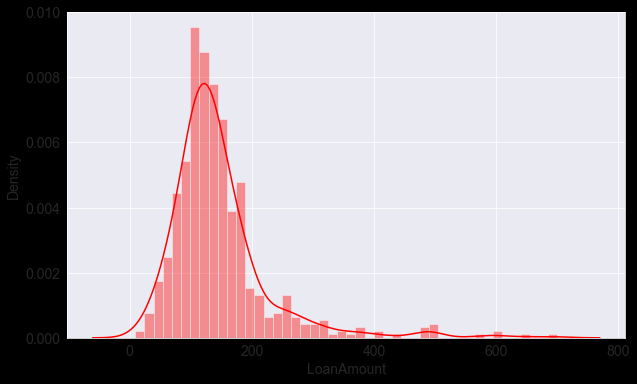

In [20]:
#VISUALIZATION OF DIFFERENT VARIABLES - TO SEE THEIR DISTRIBUTIONS. 
sns.distplot(a=loan_data.LoanAmount, color='r',  
            hist_kws={"edgecolor": 'white'}) 

2022-03-30 21:16:01,591 [1788] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

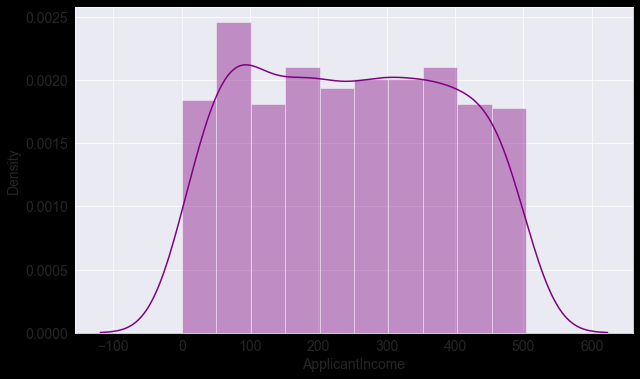

In [21]:
sns.distplot(a=loan_data.ApplicantIncome, color='purple',  
            hist_kws={"edgecolor": 'white'}, bins=10)

2022-03-30 21:16:03,256 [1788] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

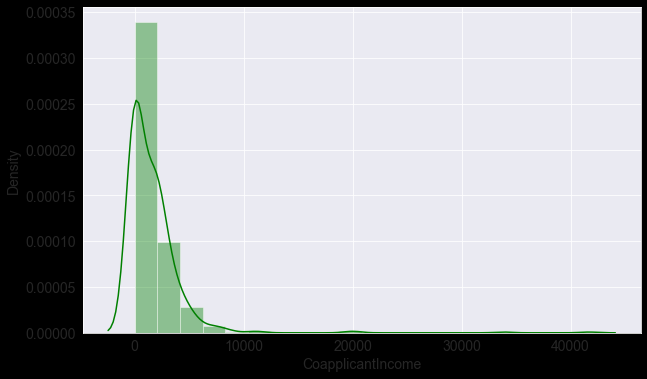

In [22]:
sns.distplot(a=loan_data.CoapplicantIncome, color='g',  
            hist_kws={"edgecolor": 'white'}, bins=20)

In [23]:
fig = px.strip(loan_data, x='Gender', y='LoanAmount', color_discrete_sequence=['green', 'grey', 'red'], title='Loan Amount in Relation to Gender')
fig.update_layout(bargap=0.1)
fig.show()

In [24]:
fig = px.strip(loan_data, x='Dependents', y='LoanAmount', color='Dependents', color_discrete_sequence=['green', 'grey', 'red', 'purple'], title='Loan Amount in Relation to Dependants')
fig.update_layout(bargap=0.1)
fig.show()

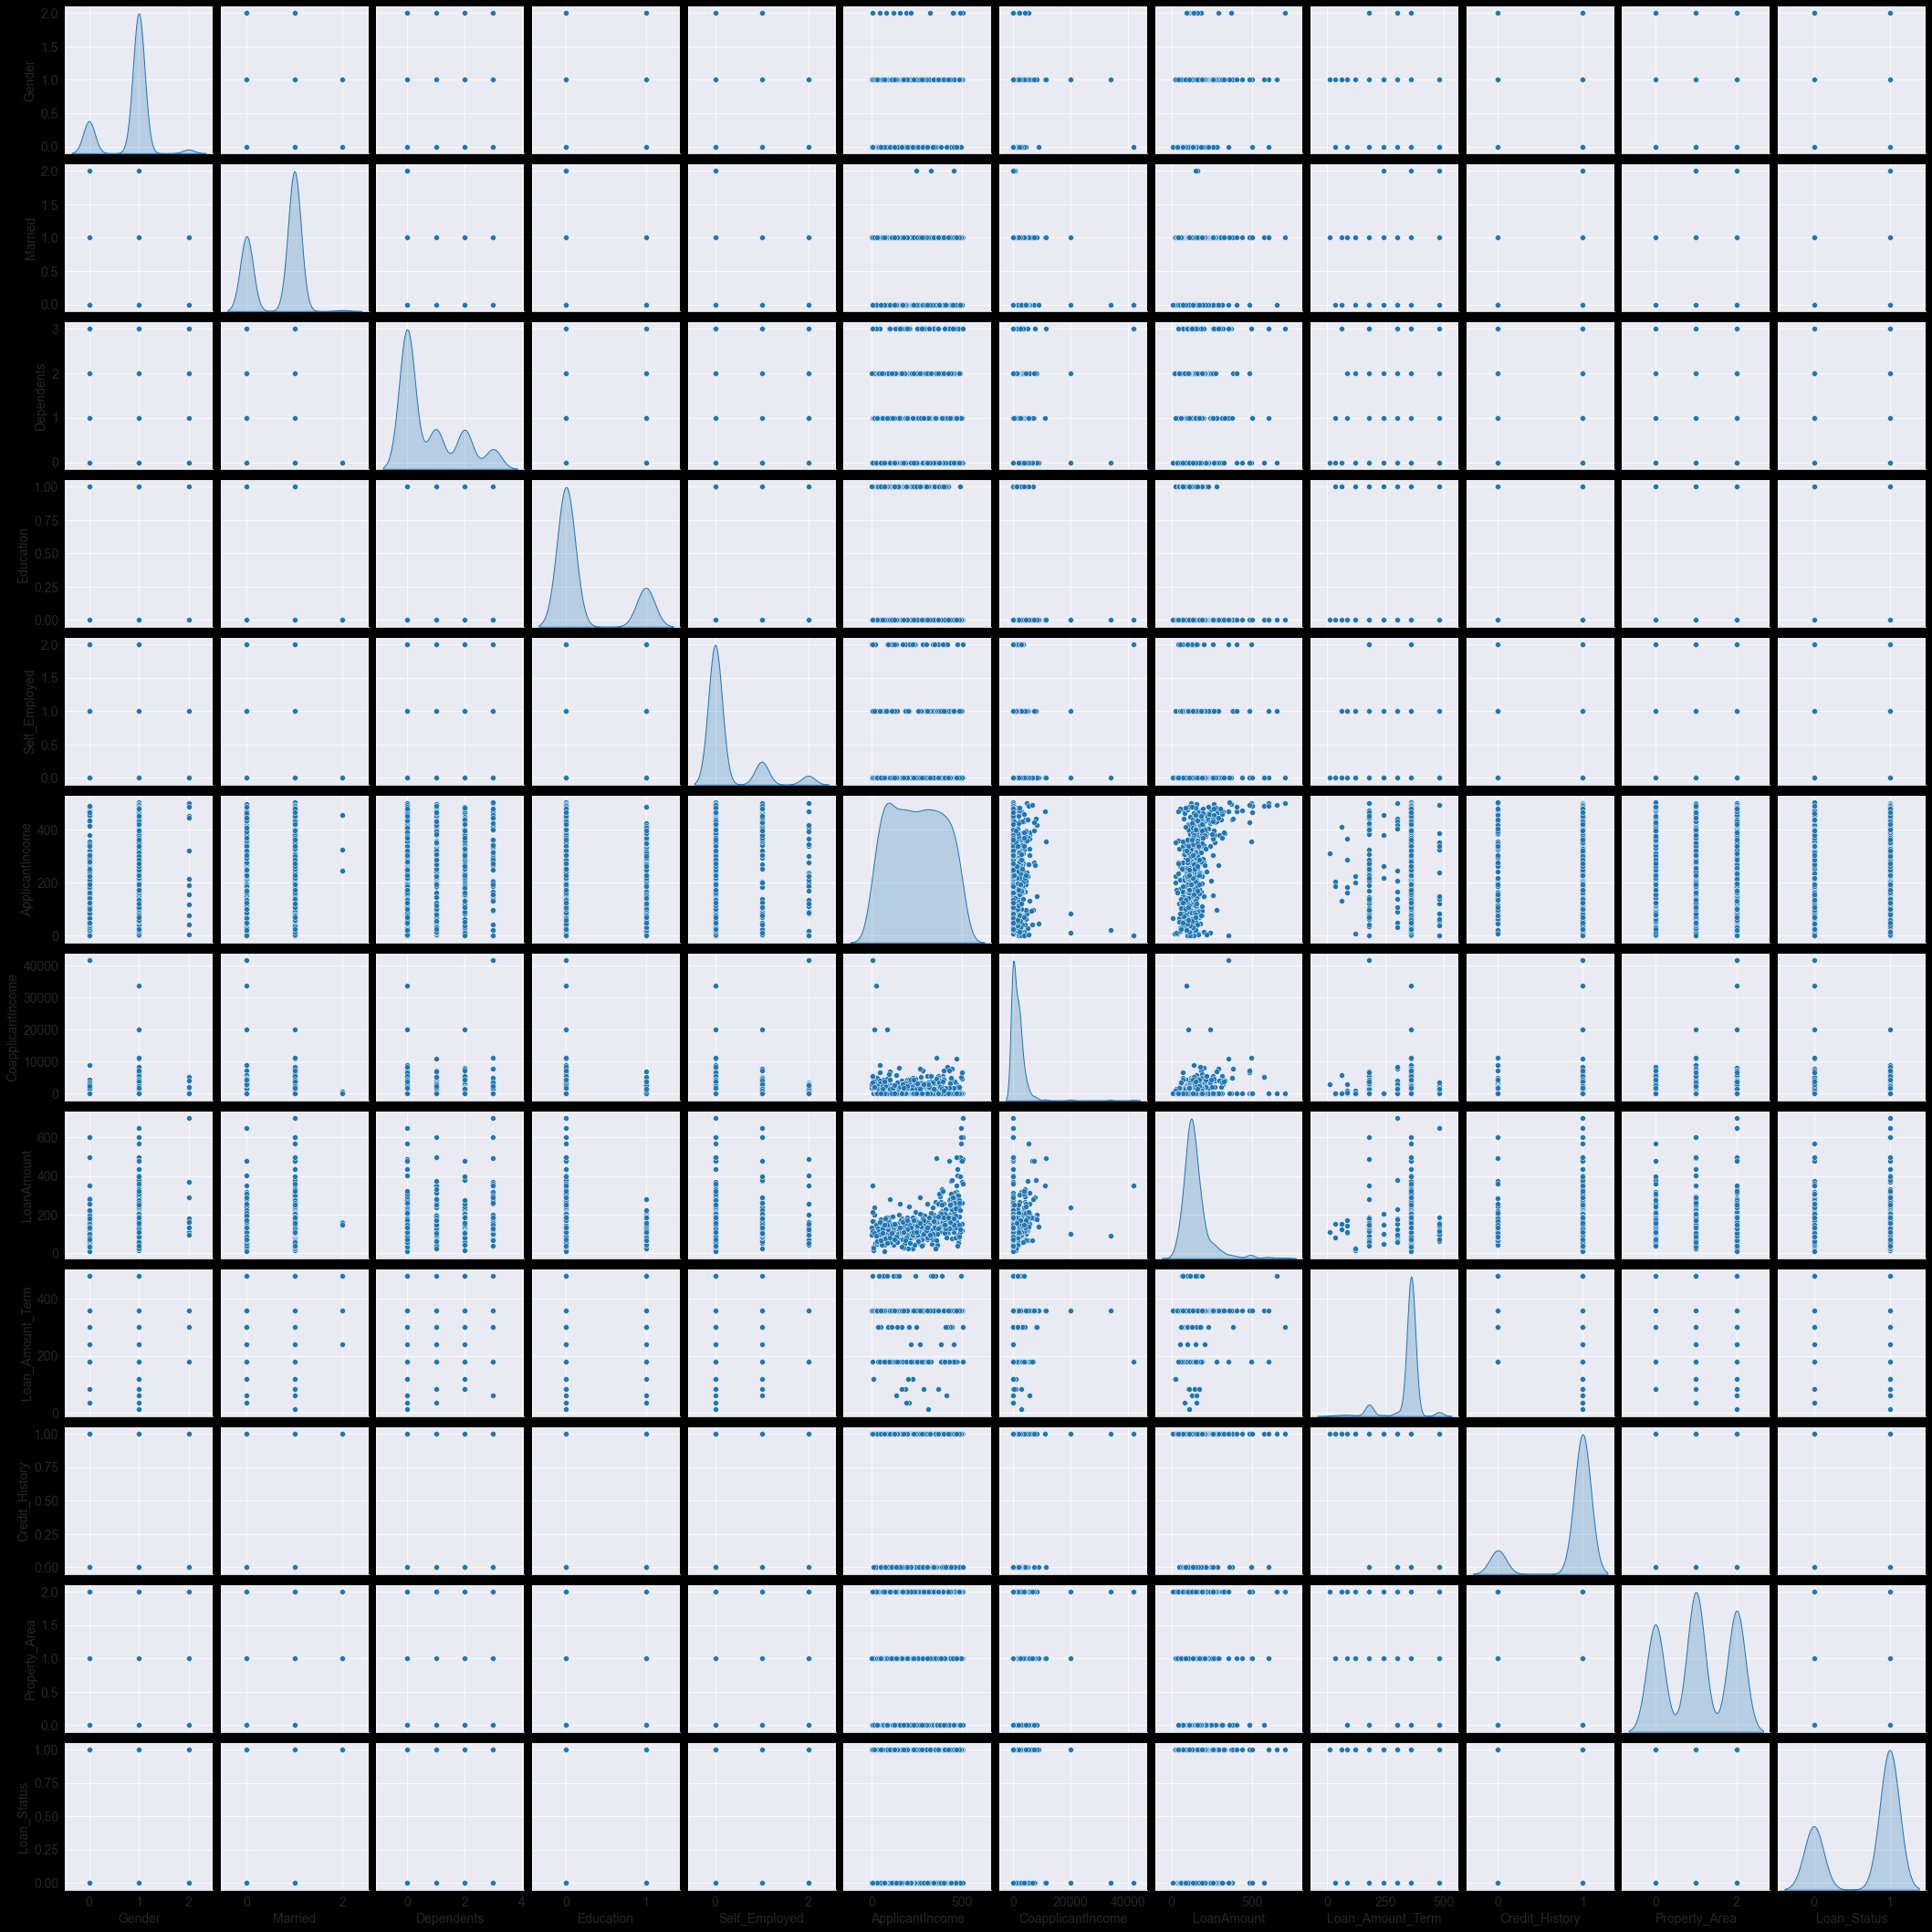

In [25]:
sns.pairplot(loan_data, diag_kind='kde')

In [26]:
fig = px.scatter(loan_data, x='LoanAmount', y='ApplicantIncome', title='Loan Amount vs Applicants Income')
fig.update_traces(marker_size=5)
fig.show()

2022-03-30 21:18:25,530 [1788] WARNING  matplotlib.legend:1193: [JupyterRequire] No handles with labels found to put in legend.


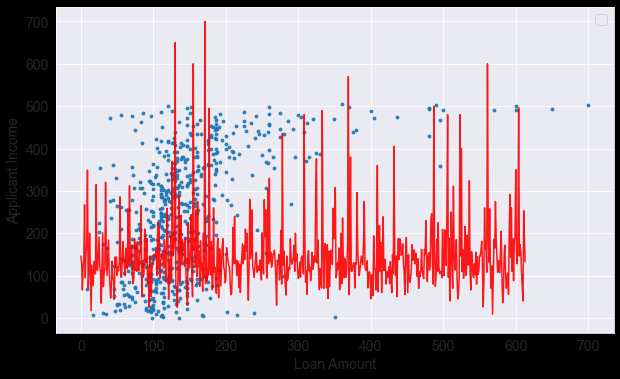

In [27]:
loan = loan_data.LoanAmount
income = loan_data.ApplicantIncome
plt.plot(loan, 'r', alpha=0.9)
plt.scatter(loan, income, s=8, alpha=0.9)
plt.xlabel('Loan Amount')
plt.ylabel('Applicant Income')
plt.legend()

In [28]:
fig = px.strip(loan_data, x='Self_Employed', y='LoanAmount', color='Self_Employed', title='Loan Amount vs Applicants Employment Status')
fig.update_traces(marker_size=5)
fig.show()

In [29]:
fig = px.strip(loan_data, x='Education', y='LoanAmount', color='Education', title='Loan Amount vs Applicants Education')
fig.update_traces(marker_size=5)
fig.show()

In [30]:
fig = px.strip(loan_data, x='Married', y='LoanAmount', color='Married', color_discrete_sequence=['red', 'purple', 'green'], title='Loan Amount in Relation to Marital Status')
fig.update_layout(bargap=0.1)
fig.show()
#MORE MARRIED PEOPLE APPLIED FOR LOANS

<Figure size 720x720 with 0 Axes>

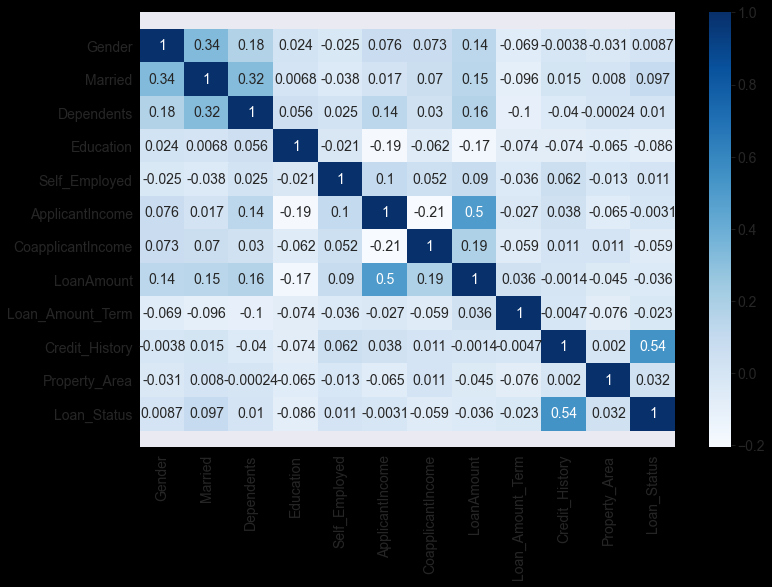

In [31]:
cor_mat = loan_data.corr()
feature_corr = cor_mat.index
plt.figure(figsize=(10,10))
f, ax= plt.subplots(figsize=(12,8))

g = sns.heatmap(loan_data[feature_corr].corr(), annot=True, cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [32]:
loan_data.groupby("Loan_Status").count()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
0,192,192,192,192,192,192,192,192,192,192,192
1,422,422,422,422,422,422,422,422,422,422,422


In [33]:
#feature selection
#we will use all columns except the Loan_status column as x inputs
X= loan_data.drop(columns =['Loan_Status'])
y = loan_data['Loan_Status']

In [34]:
#SPLITTING THE X AND y CATEGORIES INTO TRAINING AND TESTING SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=30)

In [35]:
#SCALING THE VALUES TO A SUITABLE RANGE
scaled = StandardScaler()
x_train_scaled = scaled.fit_transform(X_train)
x_test_scaled = scaled.fit_transform(X_test)

In [36]:
#DEFINING AND FITTING THE SVM MODEL
svm = SVC(kernel= 'linear', C=1, random_state=1 )
svm.fit(x_train_scaled, y_train)

SVC(C=1, kernel='linear', random_state=1)

In [37]:
#MAKING PREDICTIONS & DETERMINING THE MODEL'S ACCURACY
y_pred = svm.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = {:.1f}%'.format(accuracy*100))

Accuracy = 80.0%


In [38]:
confusion = confusion_matrix(y_test, y_pred)
scores = confusion.diagonal() / confusion.sum(axis = 1) * 100
print('Loan Status = 0: {:.2f}%'.format(scores[0]))
print('Loan Status = 1: {:.2f}%'.format(scores[1]))

Loan Status = 0: 35.29%
Loan Status = 1: 97.01%


<AxesSubplot:>

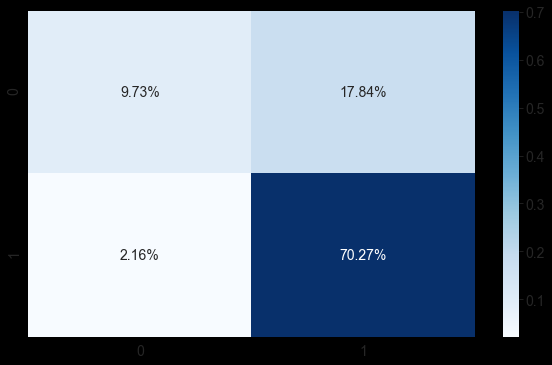

In [39]:
sns.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%', cmap='Blues')

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.35      0.49        51
           1       0.80      0.97      0.88       134

    accuracy                           0.80       185
   macro avg       0.81      0.66      0.68       185
weighted avg       0.80      0.80      0.77       185



In [41]:
mean_absolute_error(y_test, y_pred)

0.2

In [42]:
mean_squared_error(y_test, y_pred)
math.sqrt(mean_squared_error(y_test, y_pred))

0.4472135954999579

In [43]:
loan_data_test = pd.read_csv('../datasets/bankrecords.csv')

In [44]:
loan_data_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [45]:
x_ins = loan_data_test.drop(columns =['Loan_Status', 'Loan_ID'])
y_ins = loan_data_test['Loan_Status']

In [46]:
x_ins

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [48]:
numerical_cols = loan_data_test.select_dtypes(include=np.number).columns.tolist()
categorical_cols = loan_data_test.select_dtypes('object').columns.tolist()

In [49]:
numerical_cols

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [50]:
categorical_cols

['Loan_ID',
 'Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [51]:
impute_ins = SimpleImputer(strategy='mean').fit(loan_data_test[numerical_cols])
impute_ins.transform(loan_data_test[numerical_cols])

array([[0.00000000e+00, 5.84900000e+03, 0.00000000e+00, 1.46412162e+02,
        3.60000000e+02, 1.00000000e+00],
       [1.00000000e+00, 4.58300000e+03, 1.50800000e+03, 1.28000000e+02,
        3.60000000e+02, 1.00000000e+00],
       [0.00000000e+00, 3.00000000e+03, 0.00000000e+00, 6.60000000e+01,
        3.60000000e+02, 1.00000000e+00],
       ...,
       [1.00000000e+00, 8.07200000e+03, 2.40000000e+02, 2.53000000e+02,
        3.60000000e+02, 1.00000000e+00],
       [2.00000000e+00, 7.58300000e+03, 0.00000000e+00, 1.87000000e+02,
        3.60000000e+02, 1.00000000e+00],
       [0.00000000e+00, 4.58300000e+03, 0.00000000e+00, 1.33000000e+02,
        3.60000000e+02, 0.00000000e+00]])

In [52]:
encode_ins = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(loan_data_test[categorical_cols])
cols_encode_ins = list(encode_ins.get_feature_names(categorical_cols))
loan_data_test[cols_encode_ins] = encode_ins.transform(loan_data_test[categorical_cols])

In [53]:
loan_data_test_inst = loan_data_test[numerical_cols + cols_encode_ins]

In [54]:
loan_data_test_inst

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.0,5849,0.0,NaN,360.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,3000,0.0,66.0,360.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
610,3.0,4106,0.0,40.0,180.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
611,1.0,8072,240.0,253.0,360.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
612,2.0,7583,0.0,187.0,360.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
